In [ ]:

from stockbase.stock_db import *
from stockbase.stock_reader import *


stocks = db_select_stockids()

print(stocks)




In [ ]:
s = 1

with open('test_pct.csv', 'w') as f:
    f.write('name,code,pct,p0,p1,date\n')
    for s in stocks:
        df = get_kdf_from_pkl(s)
        if df is None:
            continue
        df = df.dropna(axis=0)
        # print(df)
        try:
            df0 = df[df['date']=='2019-01-02']
            if df0.empty:
                r0 = df.iloc[0,:]
            else:
                r0= df0.iloc[0,:]
            date0 = r0['date']
            c0 = r0['close']
            r1 = df.iloc[-1,:]
            c1 = r1['close']
            pct = round((c1-c0)/c0*100,2)
            name = db_id_to_name(s)

            f.write(f'{name},{s:06},{pct},{c0},{c1},{date0}\n')
        except Exception as ex:
            print(s, db_id_to_name(s))

print('pct finish')


In [ ]:
import pandas as pd


df = pd.read_csv('test_pct.csv', encoding='gbk')
print(df.columns)
print(df.index)
print(df.iloc[0,:])

df0 = df.sort_values(by='pct', ascending=False)



In [ ]:
import matplotlib.pyplot as plt


plt.hist(df0['pct'], bins=100)
plt.grid('on')
plt.show()



In [ ]:

from stockbase.stock_db import *
from stockbase.stock_reader import *


stocks = db_select_stockids()

print(stocks)

for s in stocks:
    try:
        # file = r'..\rawdata\{}.pkl'.format(get_pkl_filename(s))
        # df = get_kdf_from_pkl(s)
        # dfn = df[df['date'] >= '2021-12-27']
        # if not dfn.empty:
        #     dfn['pctChg']=dfn['pctChg']/100
        #     dfn['turn']=dfn['turn']/100
        #     df.update(dfn)
        #     df.to_pickle(file)
        #     print(file)
    except Exception as e:
        print(f'{s} {e}')

In [ ]:
print(stocks[-1])


df = get_kdf_from_pkl(600036)

# print(df.tail(8))

r = df.iloc[-1,:]
print(r)

wclose = r['amount']/r['volume']
print(wclose)

df['wc'] = df['amount']/df['volume']

df['wc']

# from MyTT import *
#
# ma60w = MA(df['wc'], 60)
# print(ma60w)


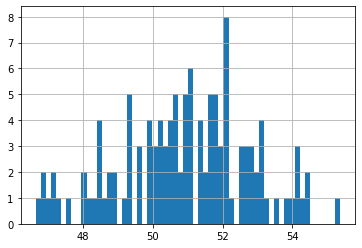

In [45]:

import matplotlib.pyplot as plt

vals = df['wc'].values[-120:]

plt.hist(vals, bins=60)
plt.grid()
plt.show()